# **Подключение библиотек**

In [ ]:
import tensorflow as tf          # Библиотека TensorFlow
# метод для отрисовки модели 
from keras.utils.vis_utils import plot_model
import gc                        # Модуль Garbage Collector - для помощи в освобождении памяти (Удаляет лишние/неиспользуемые данные)
import os                        # Модуль для работы с файлами операционной системы
import time                      # Модуль для работы со временем
import random                    # Модуль для генерации случайных значений
import seaborn as sns            # Модуль для работы с графиками и стилями
import matplotlib.pyplot as plt  # Модуль для работы с графиками и изображениями
from PIL import Image            # Методы для работы с изображениями
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Загрузка датасета**

Загрузим датасет изображений

In [ ]:
data_dir = '/content/drive/MyDrive/Landmark App/Data/'   # Присваиваем путь к базе в переменную data_dir
batch_size = 8                                           # Определяем batch size
image_size = (299, 299)                                  # Определяем размер изображений

In [ ]:
# Функция для проверки корректности расширения изображений
def check_images( data_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(data_dir)
    for klass in s_list:
        klass_path=os.path.join (data_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:
              if not f.startswith('.'):          
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', data_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # список допустимых расширений
bad_file_list, bad_ext_list=check_images(data_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')


processing class directory  7. Церковь Вознесения в Коломенском
processing class directory  2. Храм Василия Блаженного
processing class directory  6. Новодевичий монастырь
processing class directory  8. Собор Непорочного Зачатия Пресвятой Девы Марии
processing class directory  5. Храм Христа Спасителя
processing class directory  9. Музей-заповедник Царицино
processing class directory  3. Парк «Зарядье»
processing class directory  4. Москва-Сити
processing class directory  10. Кремль в Измайлово
processing class directory  11. Усадьба Кусково
processing class directory  12. Крутицкое подворье
processing class directory  13. Большой театр
processing class directory  14. Исторический музей
processing class directory  15. Цирк на Цветном бульваре
processing class directory  16. Музей изобразительных искусств имени Пушкина
processing class directory  17. Спорткомплекс Лужники
processing class directory  18. Зоопарк
processing class directory  19. Останкинская телебашня
processing cl

In [ ]:
CLASS_COUNT = len(os.listdir(data_dir))

In [ ]:
# Мы убедились, что с форматом изображений все в порядке, выведем общее количество классов
print(f'Общее количество классов для классификации: {CLASS_COUNT}')

Общее количество классов для классификации: 22


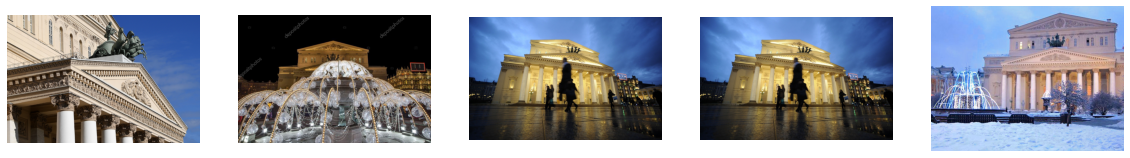

In [ ]:
# Посмотрим на несколько примеров изображений класса "Большой театр"
theatre = os.listdir(data_dir + '/13. Большой театр/')        # Путь до изображений достопримечательностей
count = 5                                                     # Укажем количество изображений

# Выведем на экран примеры случайных изображений:
f, ax = plt.subplots(1, count, figsize=(20,12))

for i in range(count):  
  sample = random.choice(theatre)                             # Используем метод random.choice() для выбора случайных изображений
  ax[i].imshow(Image.open(data_dir + '/13. Большой театр/' + sample))
  ax[i].axis('off')

С помощью метода `image_dataset_from_directory` создадим обучающий и проверочный датасеты:

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.2,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",       # Помечаем, что выборка обучающая (80%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.2,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",     # Помечаем, что выборка проверочная (20%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее
  
                             # Определяем имена классов:
class_names = train_ds.class_names
print(class_names)

Found 1005 files belonging to 22 classes.
Using 804 files for training.
Found 1005 files belonging to 22 classes.
Using 201 files for validation.
['1. Московский Кремль и Красная площадь', '10. Кремль в Измайлово', '11. Усадьба Кусково', '12. Крутицкое подворье', '13. Большой театр', '14. Исторический музей', '15. Цирк на Цветном бульваре', '16. Музей изобразительных искусств имени Пушкина', '17. Спорткомплекс Лужники', '18. Зоопарк', '19. Останкинская телебашня', '2. Храм Василия Блаженного', '20. Триумфальная Арка', '21. Сталинские Высотки', '22. ГУМ', '3. Парк «Зарядье»', '4. Москва-Сити', '5. Храм Христа Спасителя', '6. Новодевичий монастырь', '7. Церковь Вознесения в Коломенском', '8. Собор Непорочного Зачатия Пресвятой Девы Марии', '9. Музей-заповедник Царицино']


In [ ]:
# Предварительная подгрузка датасета для ускорения обучения и стабилизации
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)     # Предварительная тестовая выборка

print(train_ds)
print(val_ds)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


**Дополнительные слои** для модели, с помощью которых можно провести дополнительную аугментацию

In [ ]:
# Дополнительная аугментация в виде слоя для модели (для увеличения базы изображений)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomZoom((-0.05, 0.05)), # Произвольное увеличение и уменьшение на 10%
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.15)])     # Изменение контраста изображений 

In [ ]:
# Функция для отрисовки графиков обучения
def plot_graph(train_acc, val_acc, train_loss, val_loss):
  '''
  Функция выведет на экран графики точности и ошибки на проверочной и обучающей выборках.
  '''
  sns.set(style='darkgrid', palette='dark') 
  plt.figure(figsize=(16, 10))
  plt.subplot(2, 2, 1)
  plt.title('Точность', fontweight='bold')
  plt.plot(train_acc, label='Точность на обучащей выборке')
  plt.plot(val_acc, label='Точность на проверочной выборке')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.title('Ошибка', fontweight='bold')
  plt.plot(train_loss, label='Ошибка на обучающей выборке')
  plt.plot(val_loss, label='Ошибка на проверочной выборке')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()

  plt.show()

# EfficientNet

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.2,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",       # Помечаем, что выборка обучающая (80%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                                                             # Путь к изображениям
  validation_split = 0.2,                                               # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",                                                # Помечаем, что выборка проверочная (20%)
  seed = 123,                                                           # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                              # Размер изображений, который был задан ранее
  batch_size = batch_size)                                              # Размер батча, который был задан ранее

                                                                        # Определяем имена классов:
class_names = train_ds.class_names
print(class_names)

                                                                        # Предварительная подгрузка датасета для ускорения обучения и стабилизации
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)              # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)                  # Предварительная тестовая выборка
print(train_ds)

                                                                        # Дополнительная аугментация в виде слоя для модели (для увеличения базы изображений)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomZoom((-0.05, 0.05)), # Произвольное увеличение и уменьшение на 10%
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.15)])     # Изменение контраста изображений 

Found 1005 files belonging to 22 classes.
Using 804 files for training.
Found 1005 files belonging to 22 classes.
Using 201 files for validation.
['1. Московский Кремль и Красная площадь', '10. Кремль в Измайлово', '11. Усадьба Кусково', '12. Крутицкое подворье', '13. Большой театр', '14. Исторический музей', '15. Цирк на Цветном бульваре', '16. Музей изобразительных искусств имени Пушкина', '17. Спорткомплекс Лужники', '18. Зоопарк', '19. Останкинская телебашня', '2. Храм Василия Блаженного', '20. Триумфальная Арка', '21. Сталинские Высотки', '22. ГУМ', '3. Парк «Зарядье»', '4. Москва-Сити', '5. Храм Христа Спасителя', '6. Новодевичий монастырь', '7. Церковь Вознесения в Коломенском', '8. Собор Непорочного Зачатия Пресвятой Девы Марии', '9. Музей-заповедник Царицино']
<PrefetchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
gc.collect()                                                            # Сборка мусора для освобождения памяти
preprocess_input = tf.keras.applications.efficientnet.preprocess_input  # Нормализация данных на вход в соответствии требованиям модели
image_shape = image_size + (3,)                                         # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()         # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))              # Задаем выходной слой на нужное нам количество классов


                                                                        # Создаем базовую модель EfficientNet:
base_model = tf.keras.applications.efficientnet.EfficientNetB7(input_shape=image_shape,
                         include_top=False,                             # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                            # Используем веса уже предобученной модели на базе Imagenet


                                                                        #  Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели EfficientNet:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

258088960/258076736 [==============================] - 5s 0us/step


In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 5                                                                           # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.414274 to fit



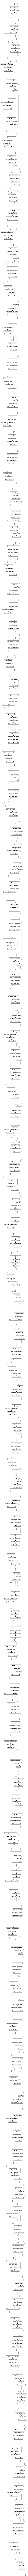

In [ ]:
plot_model(base_model)

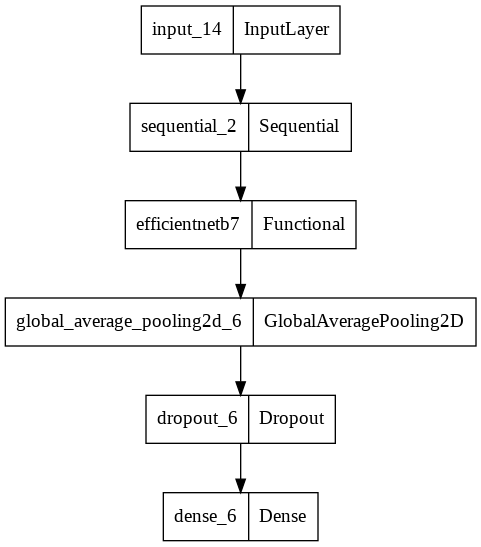

In [ ]:
plot_model(model)

Epoch 1/5
101/101 [==============================] - 268s 2s/step - loss: 1.0083 - accuracy: 0.7475 - val_loss: 0.3606 - val_accuracy: 0.9104
Epoch 2/5
101/101 [==============================] - 216s 2s/step - loss: 0.0614 - accuracy: 0.9838 - val_loss: 0.1719 - val_accuracy: 0.9552
Epoch 3/5
101/101 [==============================] - 216s 2s/step - loss: 0.0134 - accuracy: 0.9950 - val_loss: 0.4030 - val_accuracy: 0.9055
Epoch 4/5
101/101 [==============================] - 216s 2s/step - loss: 0.0284 - accuracy: 0.9925 - val_loss: 0.2132 - val_accuracy: 0.9552
Epoch 5/5
101/101 [==============================] - 216s 2s/step - loss: 8.7438e-04 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9652


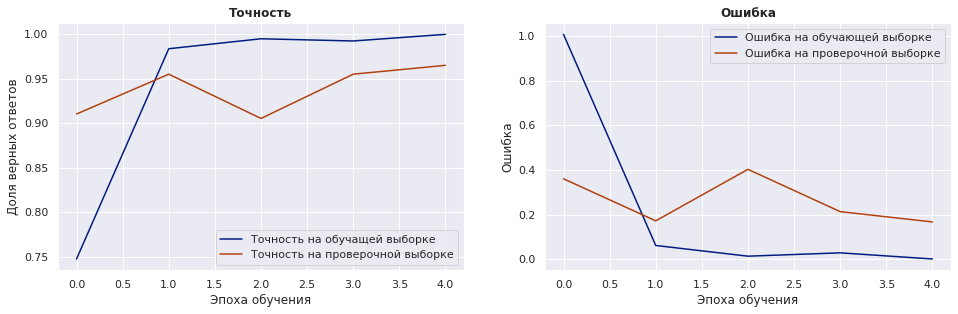

Время обучения: 1270 секунд (21.17 минут)


In [ ]:
CurrentTime = time.time()                           # Засекаем время для измерения времени обучения нейронной сети

                                                    # Обучаем модель:
hEfficientNet = model.fit(train_ds,                 # Обучающая выборка
                          epochs=epochs,            # Количество эпох обучения, заданное ранее
                          validation_data=val_ds)   # Проверочная выборка

                                                    # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hEfficientNet.history['accuracy'],
           hEfficientNet.history['val_accuracy'],
           hEfficientNet.history['loss'],
           hEfficientNet.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

model.save_weights('/content/drive/MyDrive/Landmark App/Data/landscape_hEfficientNet.h5')

In [ ]:
# Сохраняем модель
model.save('/content/drive/MyDrive/Landmark App/Data/landscape_hEfficientNet.h5')